<a href="https://colab.research.google.com/github/gabisponciano/Analise-de-Solubilidade-de-Compostos-Quimicos/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas necessárias**

In [ ]:
!pip install numpy scikit-learn


In [ ]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# **Questão 0**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Transformação de Yeo-Johnson e normalização**

In [ ]:
Ntr = 951
Nts = 316

solTrainX = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainX.txt", sep='\t')
solTrainX.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainX.csv', index = None)
solTestX = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestX.txt", sep='\t')
solTestX.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestX.csv', index = None)

all_data = np.vstack((solTrainX, solTestX))

pt = PowerTransformer(method='yeo-johnson', standardize=True)
all_data_transformed = pt.fit_transform(all_data)

scaler = StandardScaler()
all_data_normalized = scaler.fit_transform(all_data_transformed)

solTrainX_normalized = all_data_normalized[:Ntr]
solTestX_normalized = all_data_normalized[Ntr:]


## **Feature Selection de preditores com correlação de 90%**

In [ ]:

pd.DataFrame(solTrainX_normalized).to_csv('solTrainX_normalized.csv', index=False)
pd.DataFrame(solTestX_normalized).to_csv('solTestX_normalized.csv', index=False)

## Carregando os arquivos CSV de volta como objetos do pandas
solTrainX_normalized_df = pd.read_csv('solTrainX_normalized.csv')
solTestX_normalized_df = pd.read_csv('solTestX_normalized.csv')

def remove_high_corr(corr_matrix, thresh=0.8999999):
    col_names = list(corr_matrix.columns)
    n = len(col_names)
    removed_count = 0

    abs_corr = np.abs(corr_matrix.to_numpy())
    np.fill_diagonal(abs_corr, 0)

    print("Preditores removidos (em ordem):\n")
    while np.max(abs_corr) >= thresh:
        i, j = np.unravel_index(abs_corr.argmax(), abs_corr.shape)
        rdx = which_to_remove(i, j, abs_corr)

        removed_predictor = col_names.pop(rdx)
        print(removed_predictor)
        removed_count += 1

        abs_corr = np.delete(abs_corr, rdx, axis=0)
        abs_corr = np.delete(abs_corr, rdx, axis=1)
        n -= 1
    print(f"\nTotal de preditores removidos: {removed_count}")
    return col_names

def which_to_remove(i, j, abs_corr):
    '''Compara os dois preditores e remove aquele com a maior correlação com outros preditores'''
    i_absmean = np.mean(abs_corr[i, np.where(abs_corr[i, :] == 0)])
    j_absmean = np.mean(abs_corr[j, np.where(abs_corr[j, :] == 0)])

    return i if i_absmean > j_absmean else j

## Calculano a matrix de correlação
corr_dataframe = solTrainX_normalized_df.corr()

col_remained = remove_high_corr(corr_dataframe)
trainX_YJ_filtered = solTrainX_normalized_df[col_remained]
testX_YJ_filtered = solTestX_normalized_df[col_remained]

trainX_YJ_filtered.to_csv('soltrainX_YJ_Filtered.csv', index=False)
testX_YJ_filtered.to_csv('soltestX_YJ_Filtered.csv', index=False)

Preditores removidos (em ordem):

221
222
211
223
202
207
212
182
219
13
193
32
165
162
216
227
179
23
174
166
140
143
154
51
55
109
218
4
178
135
161
86
91
111
66
50

Total de preditores removidos: 36


<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


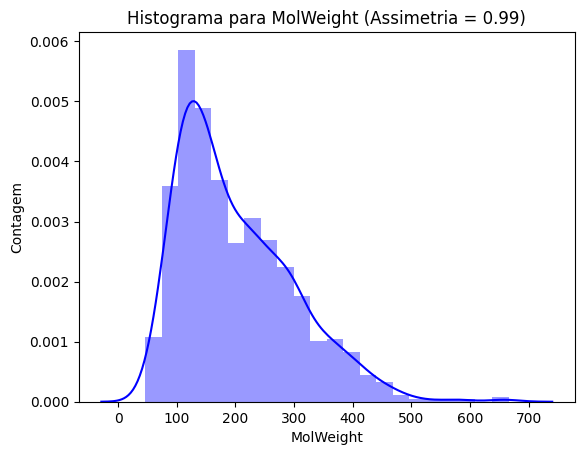

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


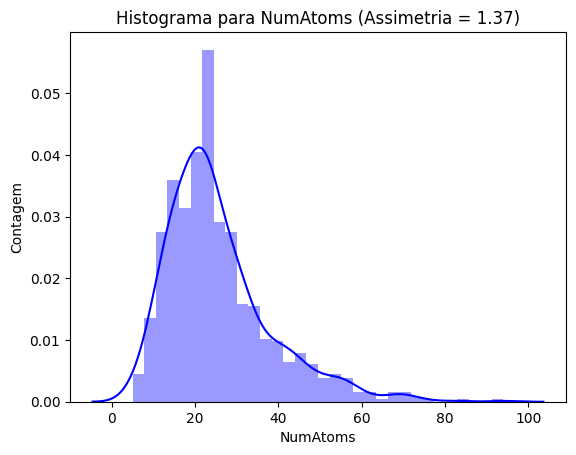

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


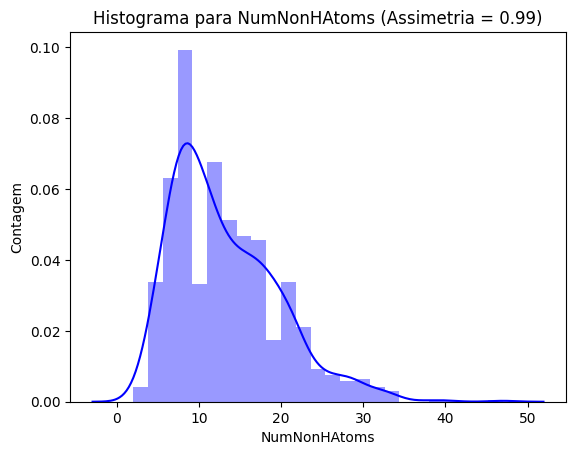

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


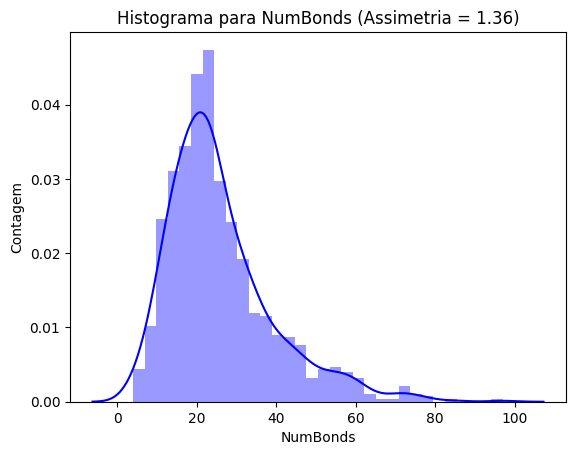

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


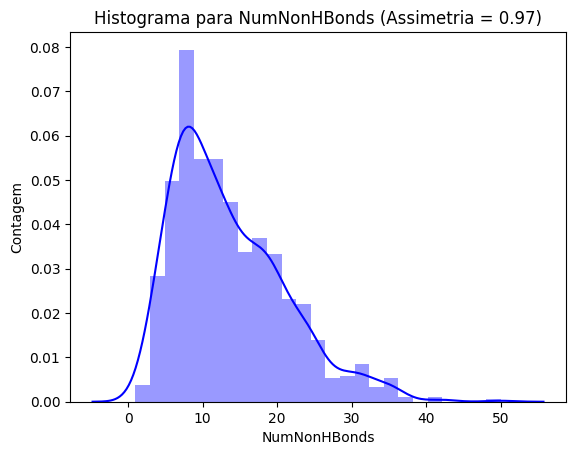

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


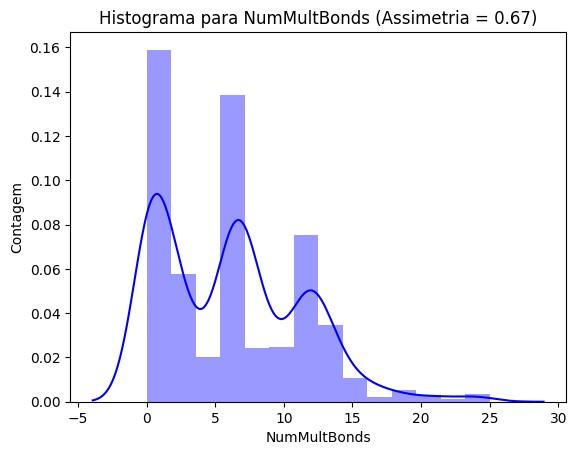

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


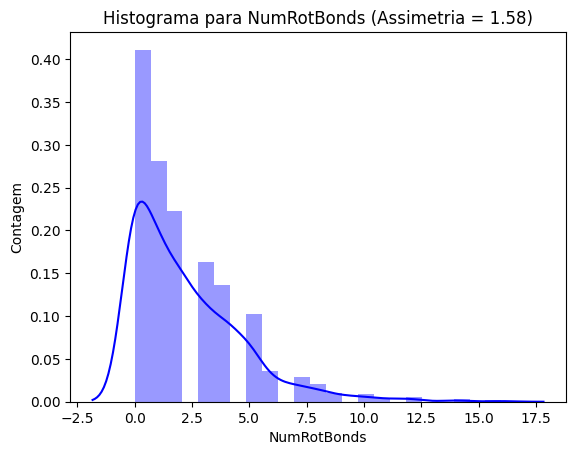

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


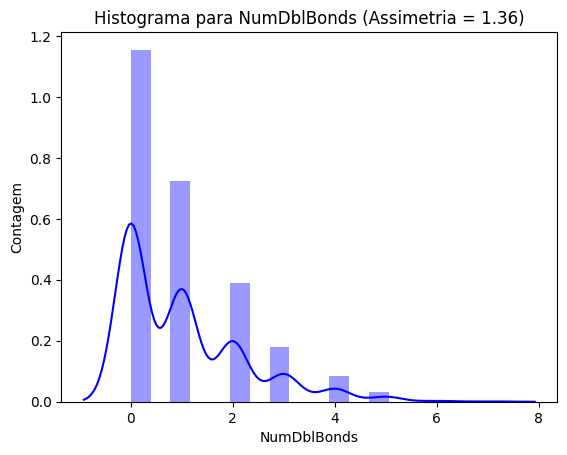

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


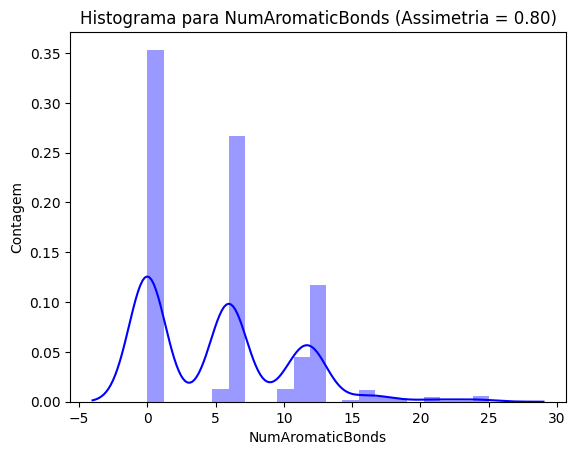

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


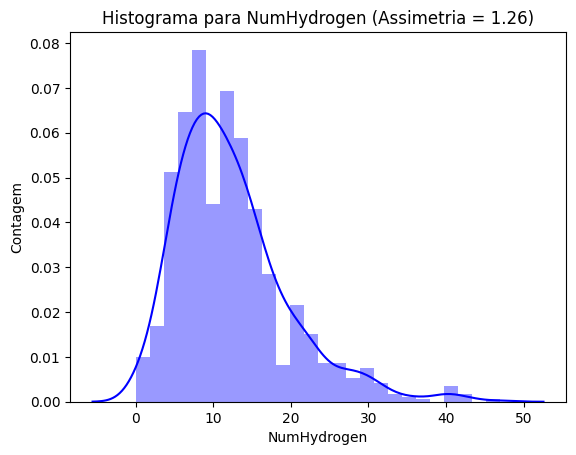

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


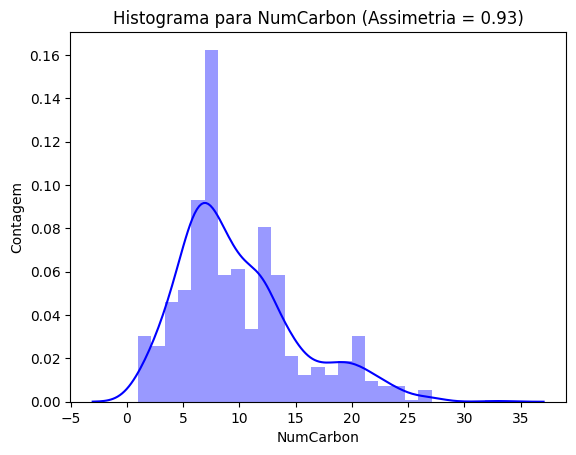

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


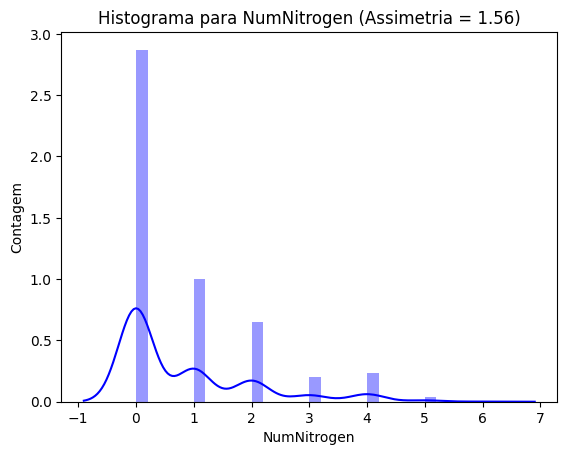

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


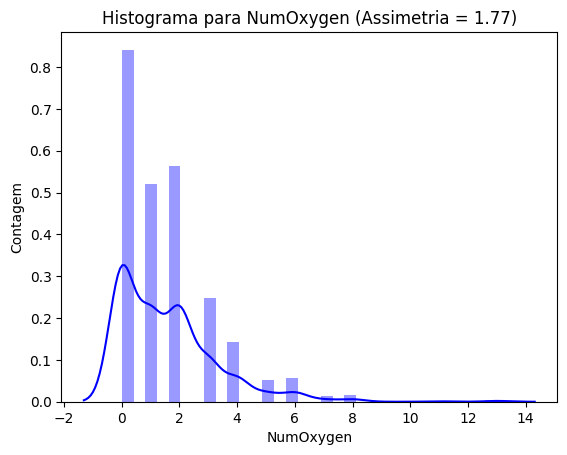

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


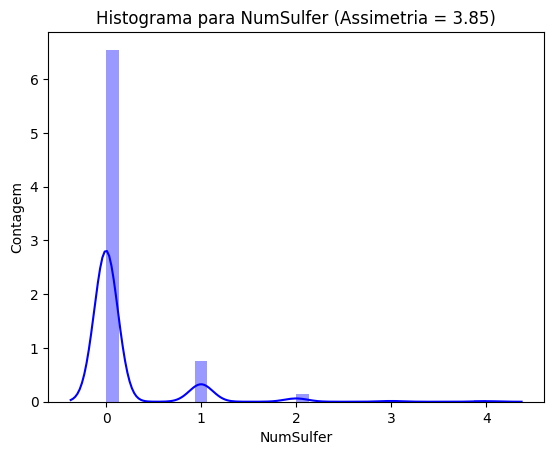

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


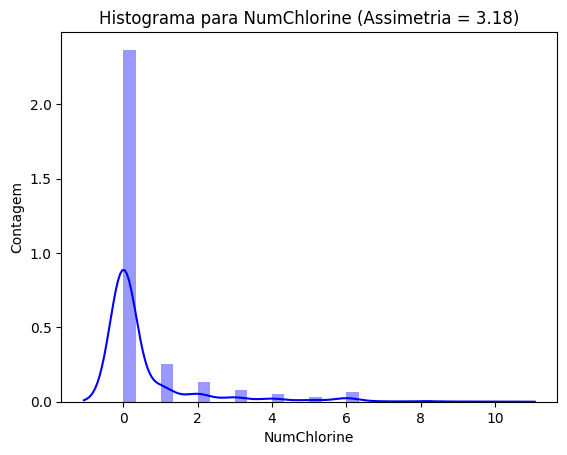

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


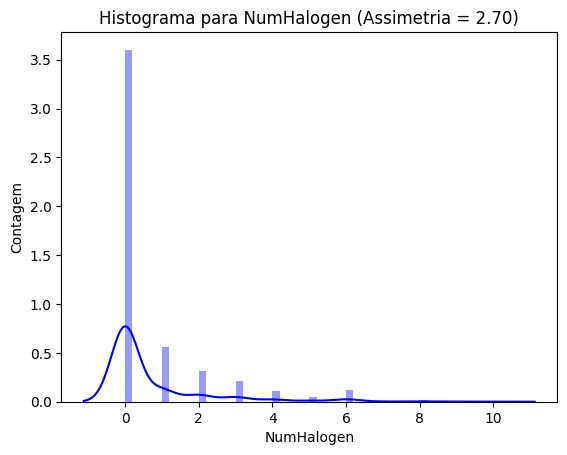

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


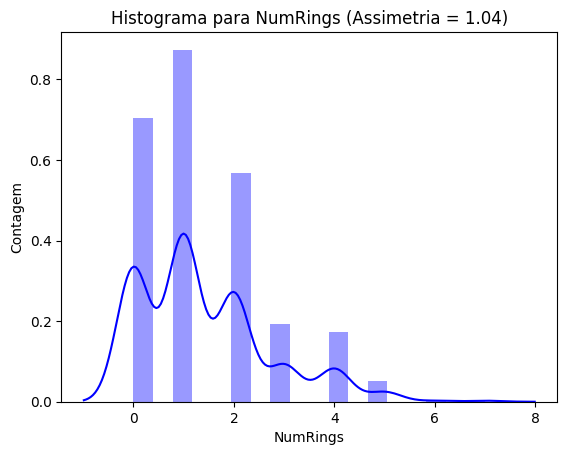

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


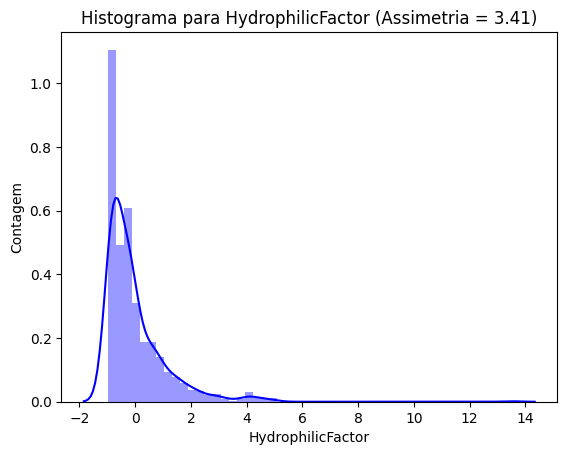

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


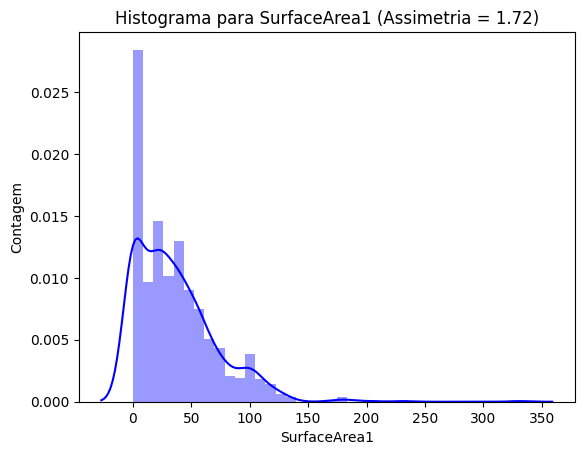

<ipython-input-13-68d2f1362e2a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


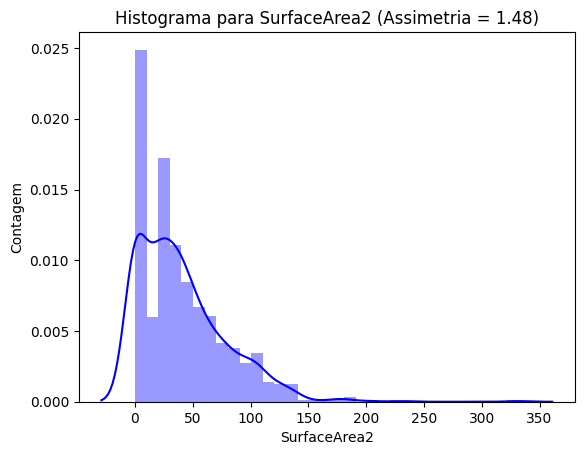

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


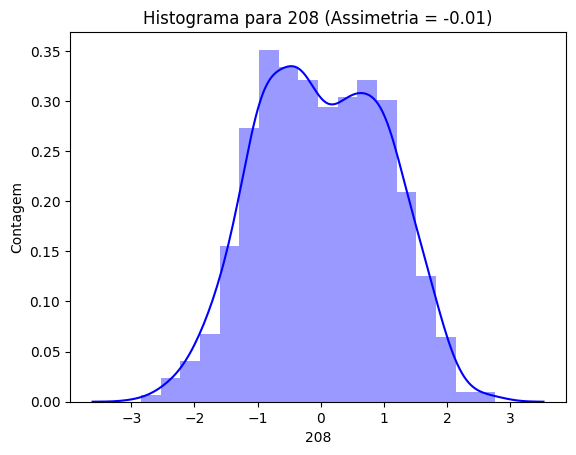

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


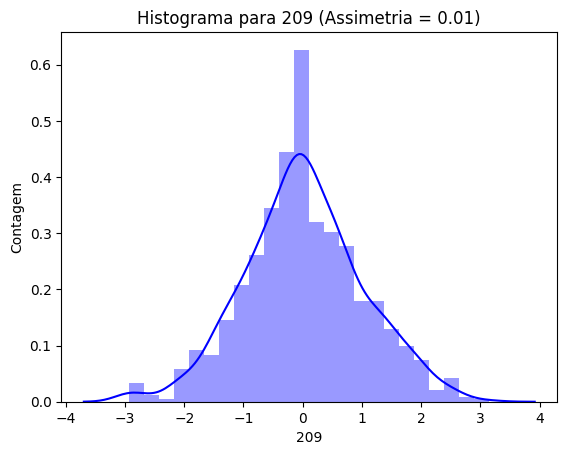

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


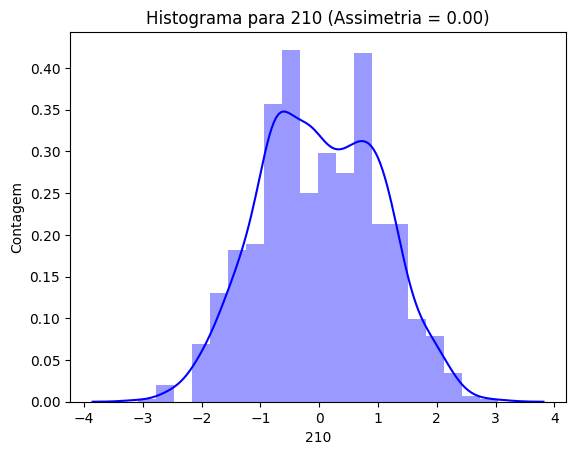

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


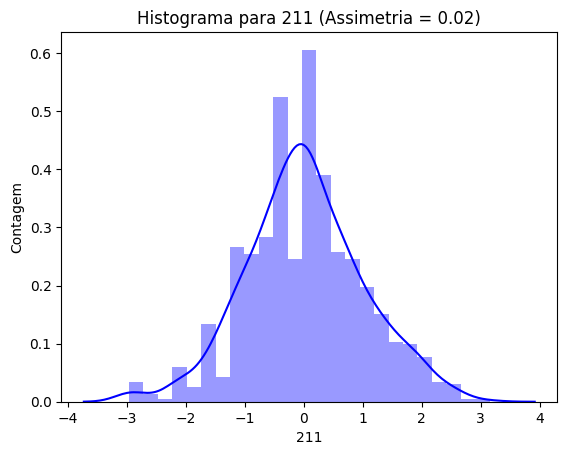

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


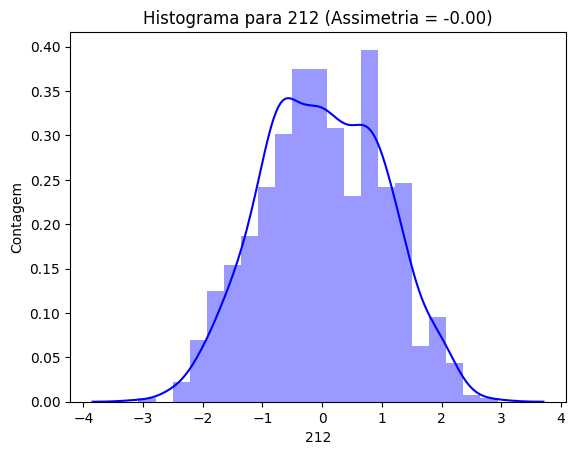

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


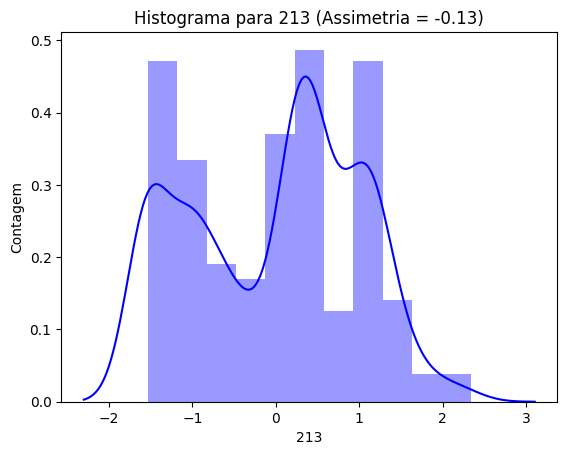

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


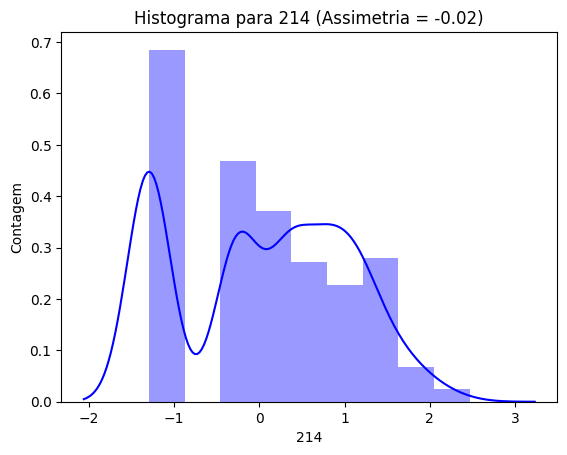

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


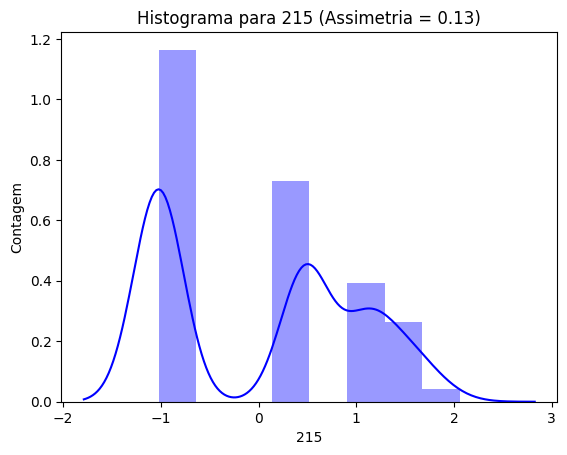

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


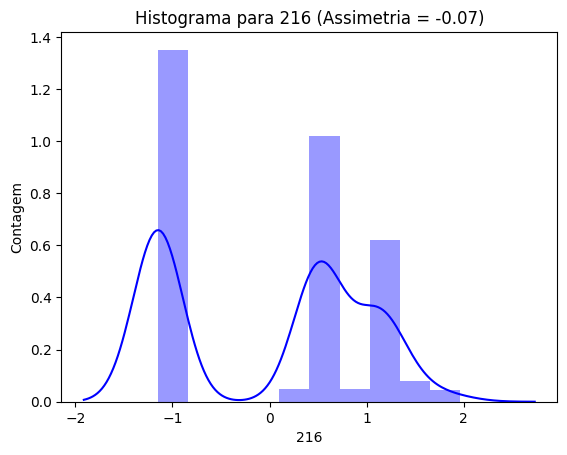

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


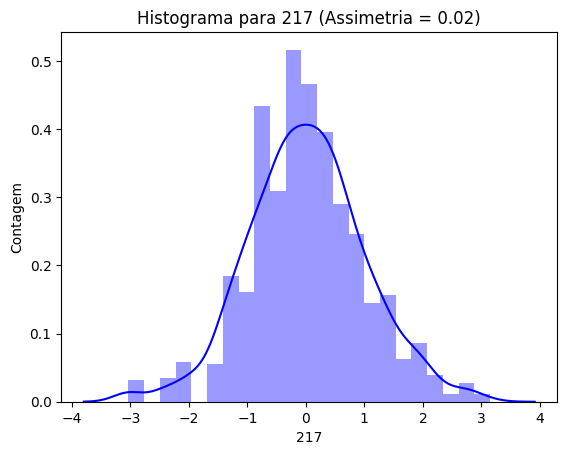

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


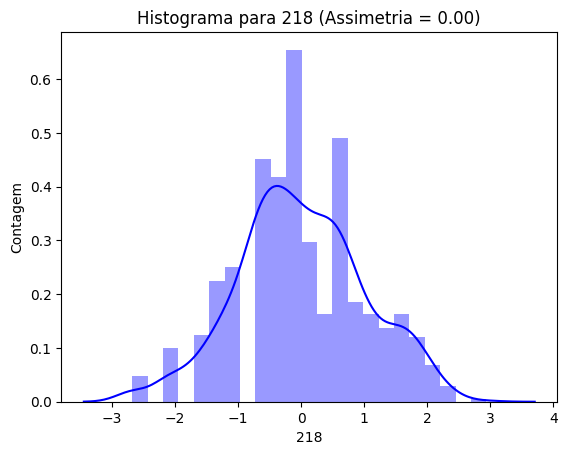

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


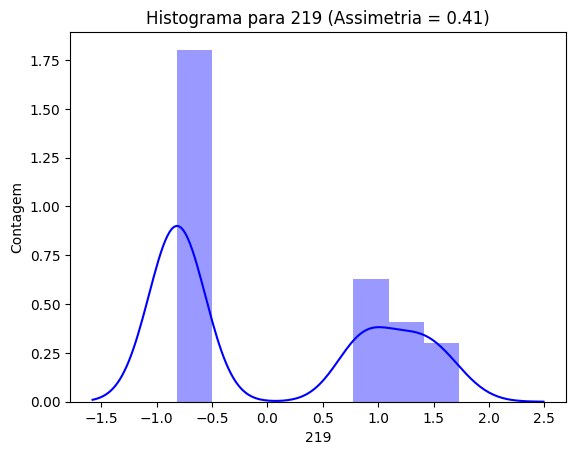

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


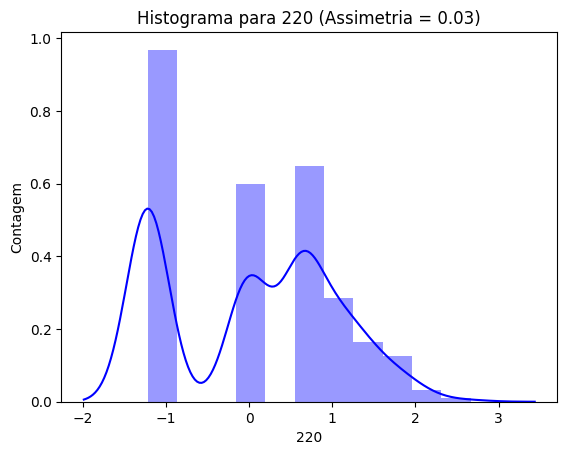

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


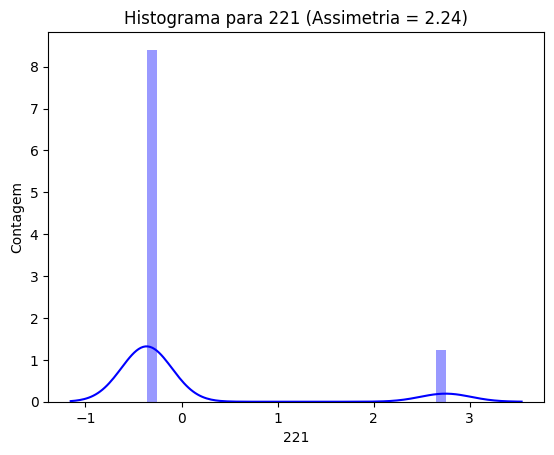

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


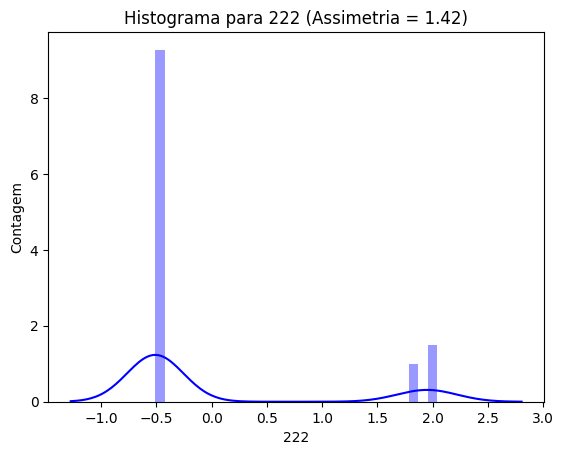

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


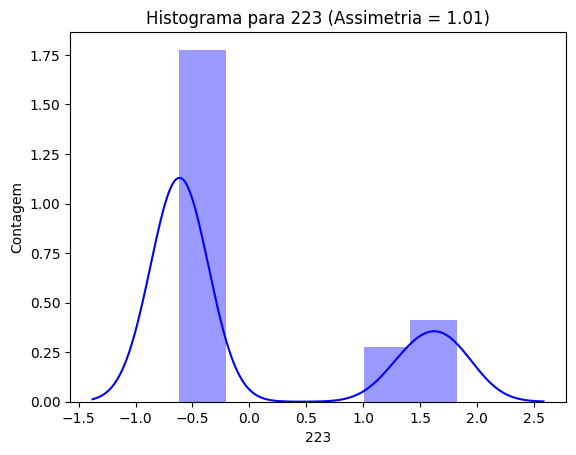

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


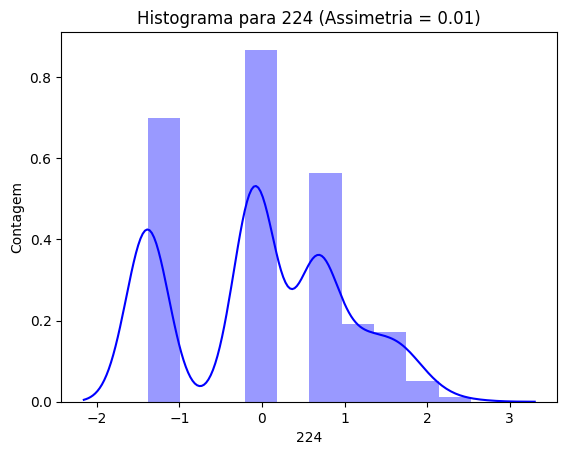

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


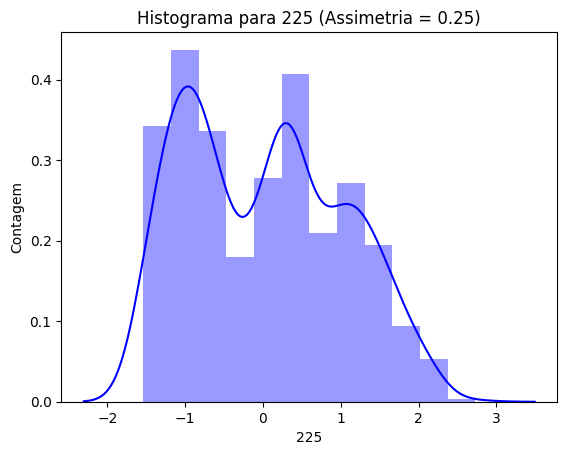

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


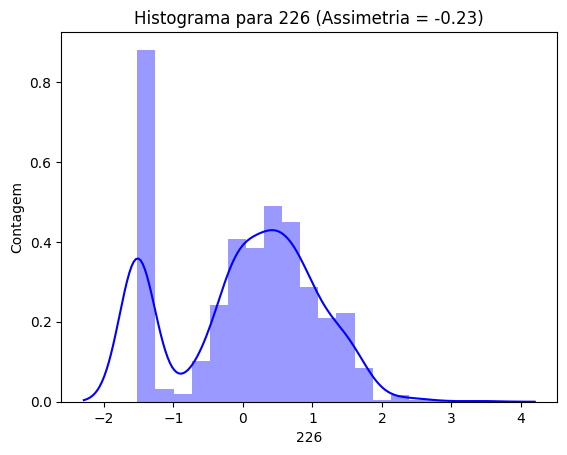

<ipython-input-13-68d2f1362e2a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist=True, kde=True, rug=False, color='blue')


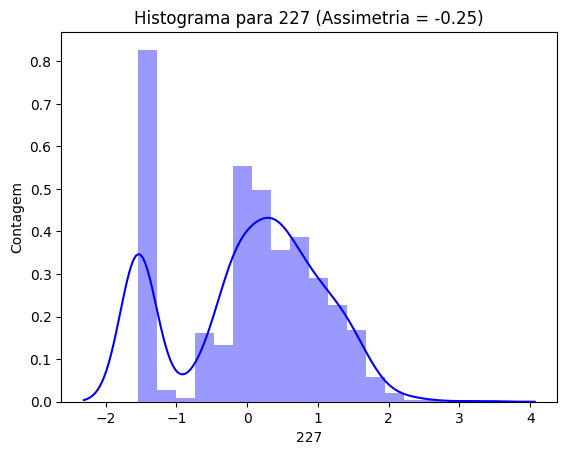

In [ ]:
for column in solTrainX.columns[208:]:
    data = solTrainX[column]
    sns.distplot(data, hist=True, kde=True, rug=False, color='blue')

    skewness = data.skew()

    plt.title(f'Histograma para {column} (Assimetria = {skewness:.2f})')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.show()



for column in solTrainX_normalized_df.columns[208:]:
    data = solTrainX_normalized_df[column]
    sns.distplot(data, hist=True, kde=True, rug=False, color='blue')

    skewness = data.skew()

    plt.title(f'Histograma para {column} (Assimetria = {skewness:.2f})')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.show()

## **Matriz de correlação antes e depois**

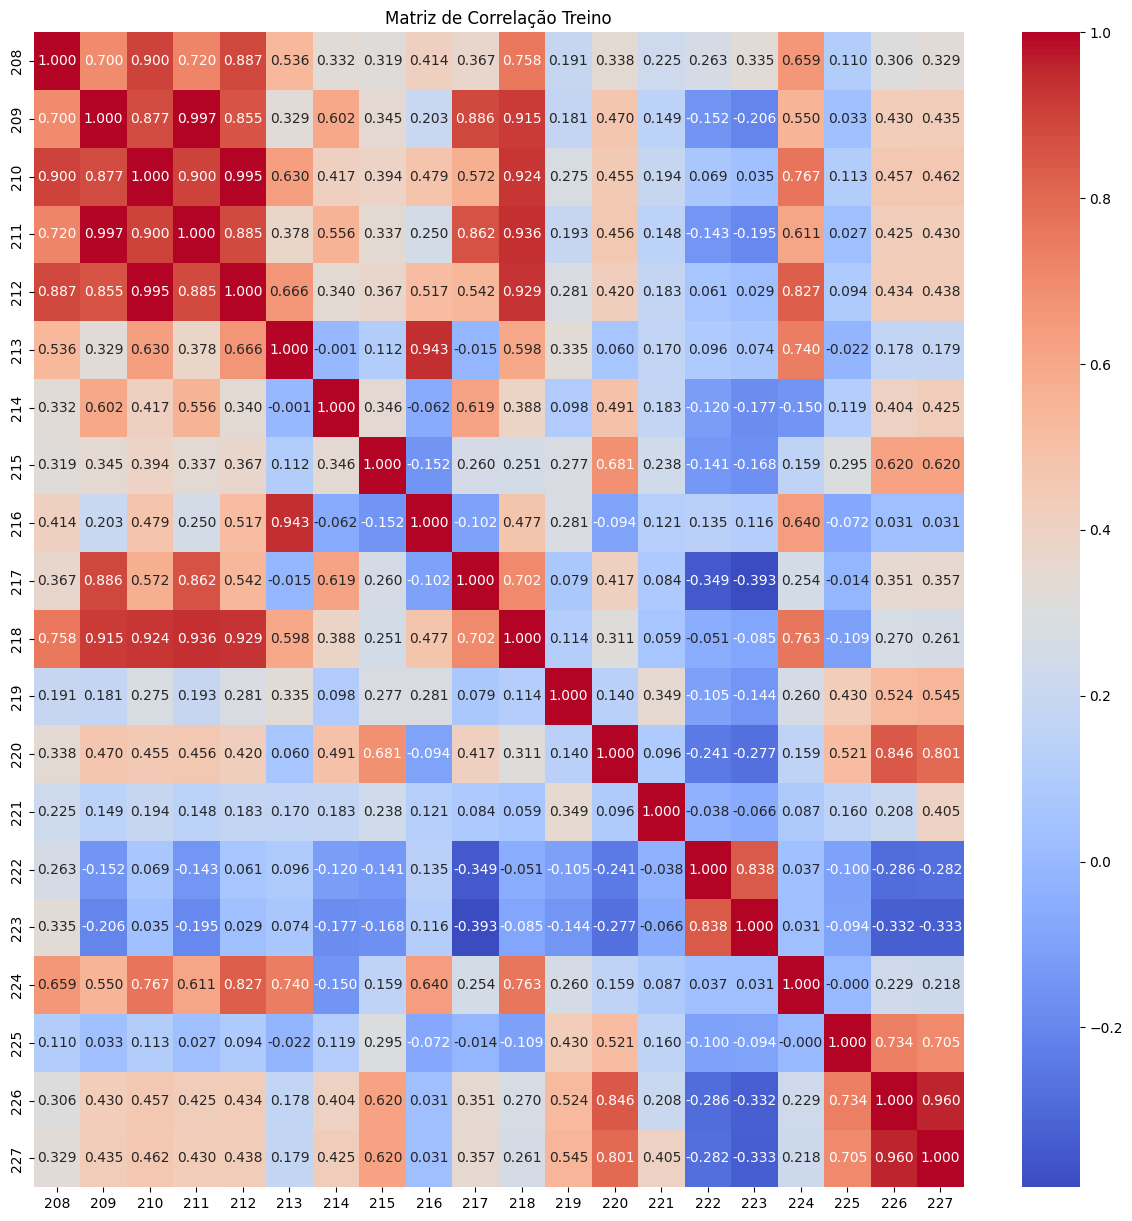

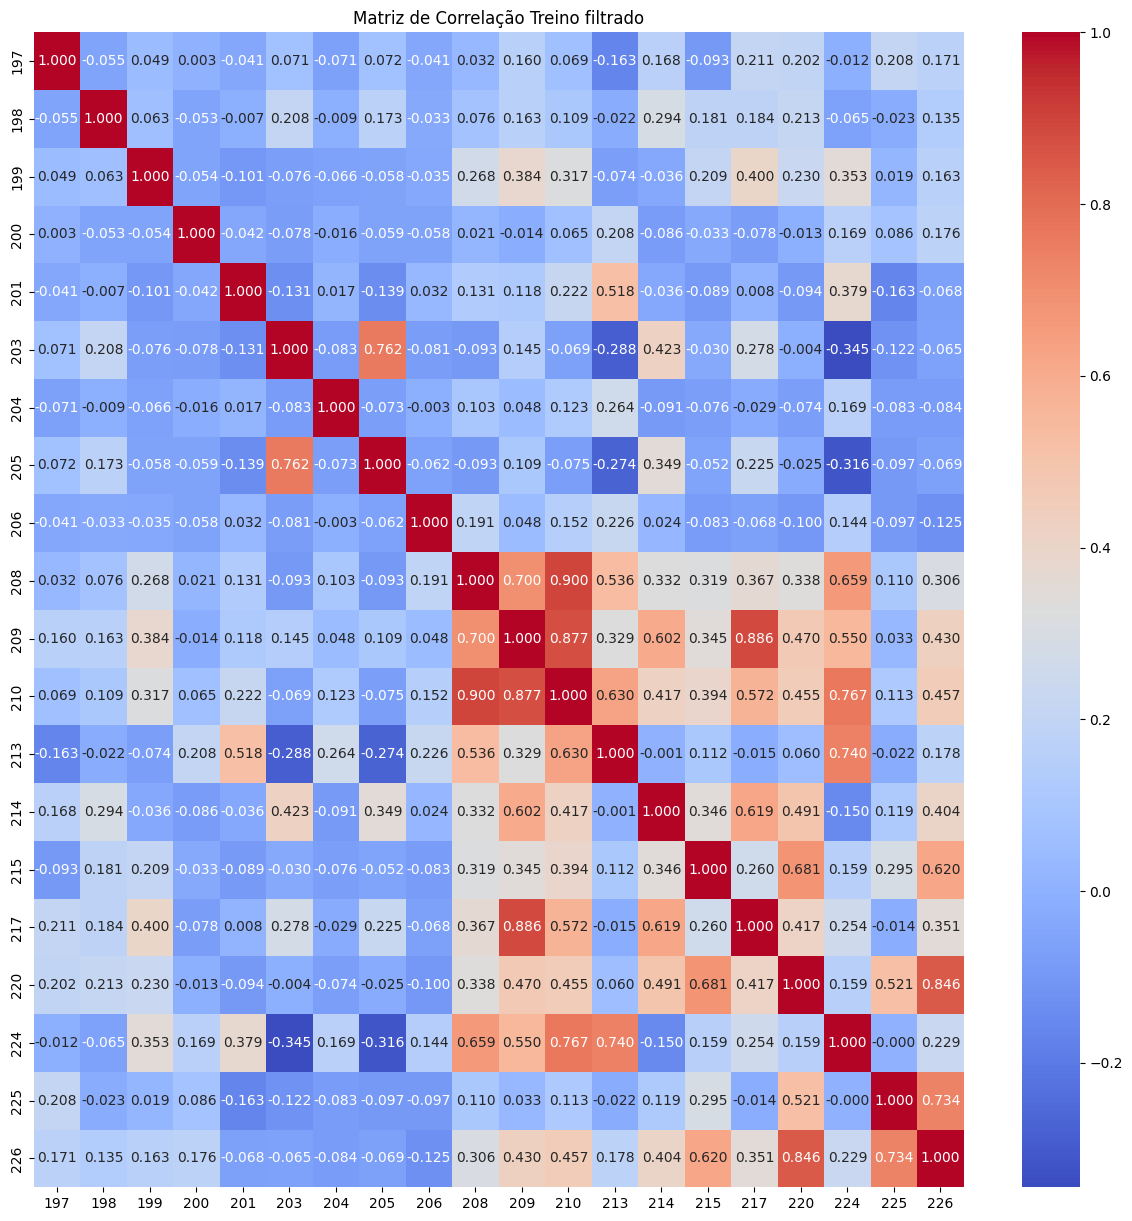

In [ ]:
continuas = solTrainX_normalized_df.iloc[:, -20:]
desc = continuas.describe()

matrizCorr = continuas.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matrizCorr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Matriz de Correlação Treino')
plt.show()

continuas = trainX_YJ_filtered.iloc[:, -20:]
desc = continuas.describe()

matrizCorr = continuas.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matrizCorr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Matriz de Correlação Treino filtrado')
plt.show()

# **Questão 1**

## **Regressão linear na mão**

In [ ]:
ones_column = np.ones((trainX_YJ_filtered.shape[0], 1))
trainX_YJ_filtered_1 = np.hstack((ones_column, trainX_YJ_filtered))

transposed_matrix = np.transpose(trainX_YJ_filtered_1)

X = trainX_YJ_filtered_1
Y = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv")
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y
XtX_inv = np.linalg.inv(np.dot(X.T, X))
XtY = np.dot(X.T, Y)

beta = np.dot(XtX_inv, XtY)

print("\nCoeficientes")
for row in beta:
    print(" ".join(f"{value:.6f}" for value in row))


Coeficientes
-2.734087
0.117323
0.060794
-0.075904
-0.123335
-0.117145
0.026698
-0.017799
-0.013654
0.154317
0.160850
-0.071035
-0.008061
-0.055995
-0.030167
-0.103877
-0.108774
-0.214898
0.096895
-0.032774
-0.071080
-0.110688
-0.086868
0.062461
0.098806
0.015648
-0.042292
-0.064167
0.022727
-0.106972
-0.027704
-0.080197
0.009306
0.046922
0.051229
-0.095349
0.161699
0.001940
0.042301
0.007514
-0.053621
0.054136
-0.001817
0.001476
0.042176
0.091029
-0.027529
0.056155
-0.004336
-0.064168
-0.036702
0.028185
-0.042147
0.080161
-0.291875
-0.104988
0.094761
0.127704
-0.071669
0.092880
0.207225
0.091405
-0.013820
0.148373
-0.472690
-0.270902
0.023446
0.042161
0.219960
0.084414
-0.177272
0.295122
0.117693
-0.128111
0.095719
-0.211744
0.187233
-0.222998
-0.025544
0.094327
0.060476
-0.026607
0.108082
0.090345
-0.048514
-0.010357
-0.164685
-0.013161
-0.055679
0.052887
-0.065497
-0.067553
0.065190
-0.073995
-0.080358
-0.032741
0.061350
-0.087333
0.004511
0.262254
-0.143930
0.069703
-0.036479
-0.0

## **Regressão linear pela função do python**

In [ ]:
x = trainX_YJ_filtered[:].values
y = Y['x'].values

trainX_YJ_num = pd.get_dummies(trainX_YJ_filtered)

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     56.42
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:32:19   Log-Likelihood:                -733.18
No. Observations:                 951   AIC:                             1852.
Df Residuals:                     758   BIC:                             2790.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7341      0.020   -139.734      0.0

## **Aplicação da regressão no teste e calculo do rmse e r2**

In [ ]:
X_train = trainX_YJ_filtered.values
y_train = Y.values

Ytest = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv")
X_test = testX_YJ_filtered.values
y_test = Ytest.values

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

r_squared = r2_score(y_test, y_pred)
rmse = calculate_rmse(y_test, y_pred)

print(f'R²: {r_squared}')
print(f'RMSE: {rmse}')

model = LinearRegression()
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))

print('\nk = 5')
print(f'R² (Média): {r2_scores.mean()}')
print(f'RMSE (Média): {rmse_scores.mean()}')

print('\nk = 10')

num_splits = 10
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))

print(f'R² (Média): {r2_scores.mean()}')
print(f'RMSE (Média): {rmse_scores.mean()}')

R²: 0.8725468047691449
RMSE: 0.7408517365014455

k = 5
R² (Média): 0.8741780168979043
RMSE (Média): 0.7204487053044992

k = 10
R² (Média): 0.873824971821119
RMSE (Média): 0.7070630937800193


## **Cross-validation sem função do python**

In [ ]:
num_splits = 5
model = LinearRegression()
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
print('K = 5')
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    r2_fold = r2_score(y_test_fold, y_pred_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
    r2_scores.append(r2_fold)
    rmse_scores.append(rmse_fold)

mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)

print(f'R² (Média): {mean_r2}')
print(f'RMSE (Média): {mean_rmse}')

num_splits = 10
model = LinearRegression()
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
r2_scores = []
rmse_scores = []

print('\nK = 10')
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    r2_fold = r2_score(y_test_fold, y_pred_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
    r2_scores.append(r2_fold)
    rmse_scores.append(rmse_fold)

mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)

print(f'R² (Média): {mean_r2}')
print(f'RMSE (Média): {mean_rmse}')

K = 5
R² (Média): 0.8741780168979043
RMSE (Média): 0.7204487053044992

K = 10
R² (Média): 0.873824971821119
RMSE (Média): 0.7070630937800193


# **Questão 2**

## **Lendo os arquivos**

In [ ]:
Y_test = pd.read_csv("/content/solTestY.txt", sep='\t')
Y_test.to_csv('/content/solTestY.csv', index = None)
Y_train = pd.read_csv("/content/solTrainY.txt", sep='\t')
Y_train.to_csv('/content/solTrainY.csv', index = None)

In [ ]:
X_train = pd.read_csv('/content/XTrain.csv')
X_test= pd.read_csv('/content/XTest.csv')

## **Função Pronta**

In [ ]:
## Valores do lambda
inicio = 0.1
fim = 25
passo = 0.2

lambda_values = np.arange(inicio, fim + passo, passo)
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=10, random_state=42, shuffle=True)

for alpha in lambda_values:
    rmse_fold = []
    r2_fold = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
        y_train_fold, y_val_fold = Y_train.values[train_index], Y_train.values[val_index]

        model = Ridge(alpha=alpha)
        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_val_fold)

        rmse_fold.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))
        r2_fold.append(r2_score(y_val_fold, y_pred))

        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        r2 = r2_score(y_val_fold, y_pred)

        rmse_fold.append(rmse)
        r2_fold.append(r2)

        print(f"RMSE for alpha={alpha}: {rmse}")
        print(f"R2 Score for alpha={alpha}: {r2}")

    rmse_scores.append(np.mean(rmse_fold))
    r2_scores.append(np.mean(r2_fold))


optimal_lambda_index = np.argmin(rmse_scores)

optimal_lambda = lambda_values[optimal_lambda_index]
optimal_rmse = rmse_scores[optimal_lambda_index]
optimal_r2 = r2_scores[optimal_lambda_index]

print("Optimal Lambda:", optimal_lambda)
print("Optimal RMSE:", optimal_rmse)
print("Optimal R2 Score:", optimal_r2)

## **Função do zero**

Optimal Lambda: 12.900000000000002
Optimal RMSE: 0.716277073873394
Optimal R2 Score: 0.8711563237303421


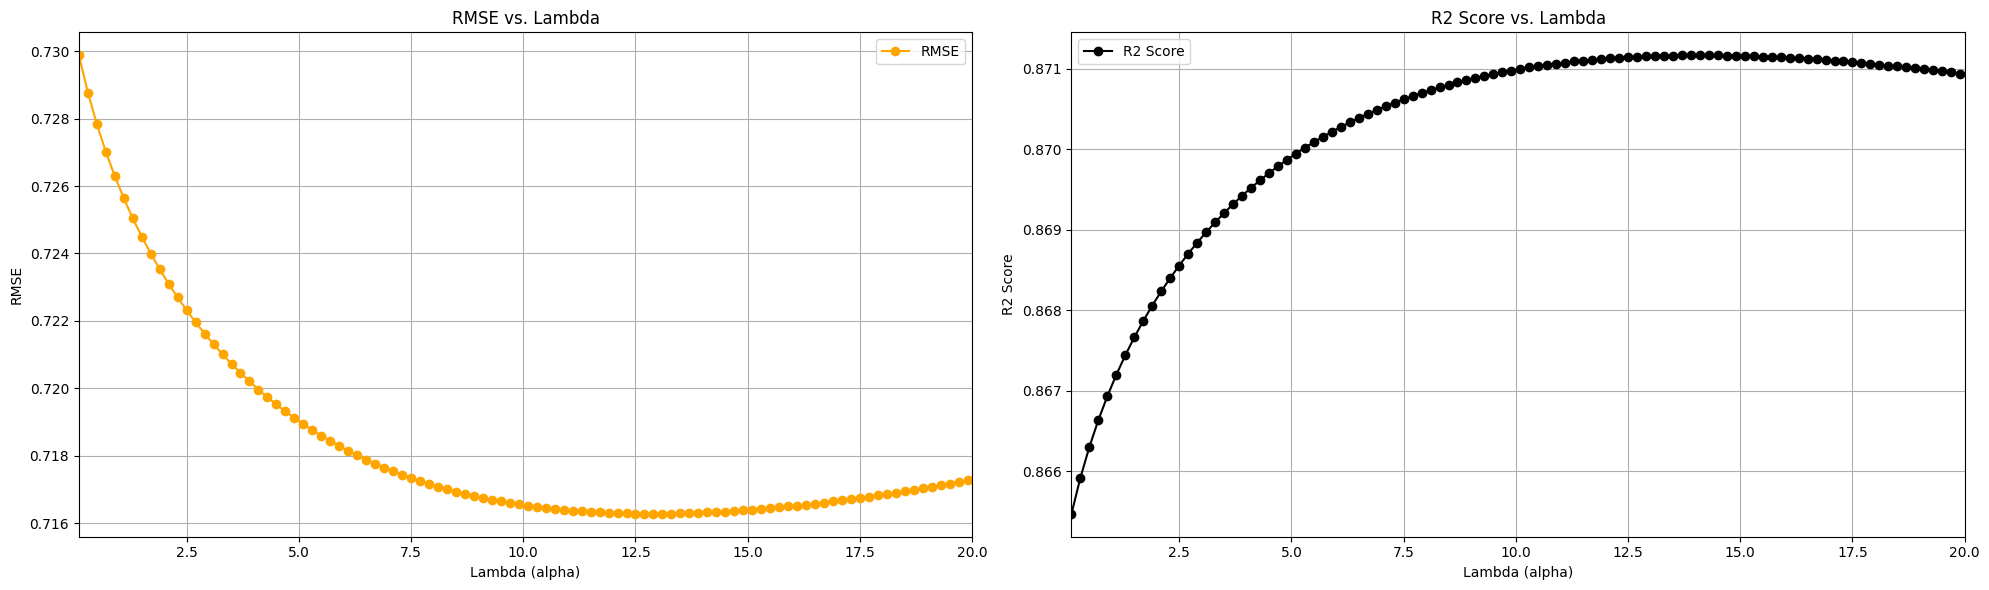

In [ ]:
class RidgeRegression:
    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        X = np.array([[1] + row for row in X])
        X_transpose = np.transpose(X)
        identity = np.identity(X.shape[1])
        self.beta = np.linalg.inv(np.dot(X_transpose, X) + self.alpha * identity).dot(X_transpose).dot(y)

    def predict(self, X):
        X = np.array([[1] + row for row in X])
        return np.dot(X, self.beta)


inicio = 0.1
fim = 20
passo = 0.2

lambda_values = np.arange(inicio, fim + passo, passo)
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=10, random_state=42, shuffle=True)

for penalty in lambda_values:
    rmse_fold = []
    r2_fold = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
        y_train_fold, y_val_fold = Y_train.values[train_index], Y_train.values[val_index]

        model = RidgeRegression(alpha=penalty)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        rmse_fold.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))
        r2_fold.append(r2_score(y_val_fold, y_pred))

    rmse_scores.append(sum(rmse_fold) / len(rmse_fold))
    r2_scores.append(sum(r2_fold) / len(r2_fold))

optimal_lambda_index = np.argmin(rmse_scores)
optimal_lambda = lambda_values[optimal_lambda_index]
optimal_rmse = min(rmse_scores)
optimal_r2 = r2_scores[optimal_lambda_index]

print("Optimal Lambda:", optimal_lambda)
print("Optimal RMSE:", optimal_rmse)
print("Optimal R2 Score:", optimal_r2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(lambda_values, rmse_scores, marker='o', color='orange', label='RMSE')
ax1.set_xlabel('Lambda (alpha)')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE vs. Lambda')
ax1.legend()
ax1.grid(True)
ax1.set_xlim(0.1, 20)

ax2.plot(lambda_values, r2_scores, marker='o', color='black', label='R2 Score')
ax2.set_xlabel('Lambda (alpha)')
ax2.set_ylabel('R2 Score')
ax2.set_title('R2 Score vs. Lambda')
ax2.legend()
ax2.grid(True)
ax2.set_xlim(0.1, 20)

plt.tight_layout()
plt.show()


# **Questão 3**

## **PLS com os conjuntos pré processados que vieram no arquivo do HW**

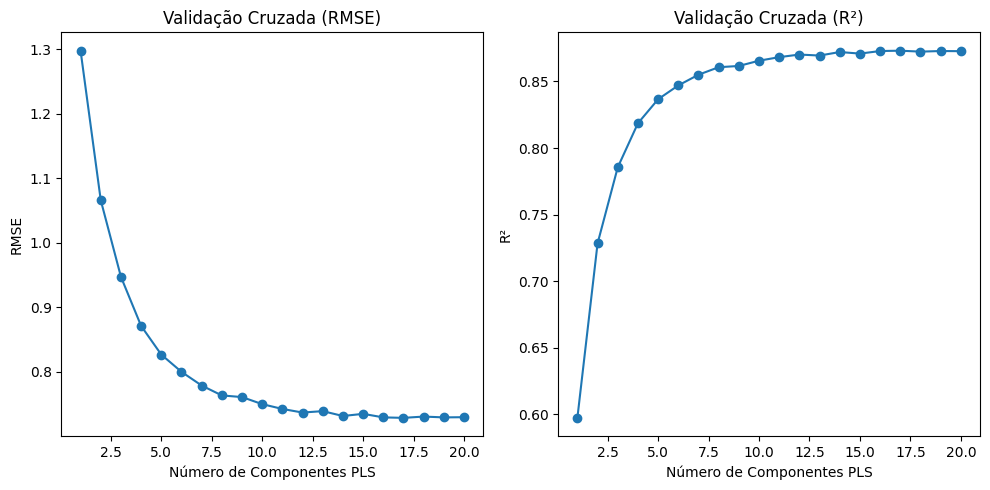

Número ideal de componentes: 17
RMSE no conjunto de teste: 0.7299
R² no conjunto de teste: 0.8763


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainXtrans.txt", sep='\t')
X_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainXtrans.csv', index = None)

y_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.txt", sep='\t')
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv', index = None)

X_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestXtrans.txt", sep='\t')
X_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestXtrans.csv', index = None)

y_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.txt", sep='\t')
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv', index = None)

## Testando os componentes
n_components = list(range(1, 21))

rmse_scores = []
r2_scores = []

## Escolhemos a validação cruzada de 5 dobras
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for n in n_components:
    pls = PLSRegression(n_components=n)
    y_pred = cross_val_predict(pls, X_train, y_train, cv=kf)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components, rmse_scores, marker='o')
plt.xlabel('Número de Componentes PLS')
plt.ylabel('RMSE')
plt.title('Validação Cruzada (RMSE)')

plt.subplot(1, 2, 2)
plt.plot(n_components, r2_scores, marker='o')
plt.xlabel('Número de Componentes PLS')
plt.ylabel('R²')
plt.title('Validação Cruzada (R²)')

plt.tight_layout()
plt.show()

## Ver qual o melhor número de componentes com base no menor RMSE
optimal_n_components = n_components[np.argmin(rmse_scores)]
print(f"Número ideal de componentes: {optimal_n_components}")


pls = PLSRegression(n_components=optimal_n_components)
pls.fit(X_train, y_train)

## Teste
y_pred_test = pls.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"RMSE no conjunto de teste: {rmse_test:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")


## **PCR com os conjuntos pré processados que vieram no arquivo do HW**

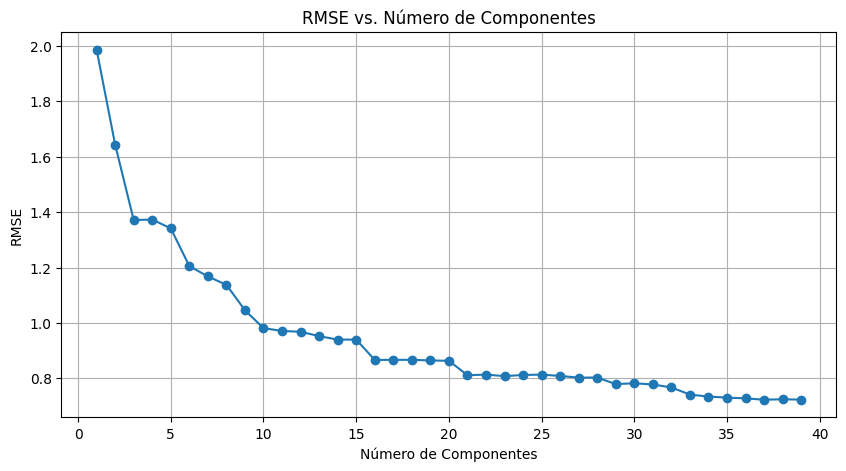

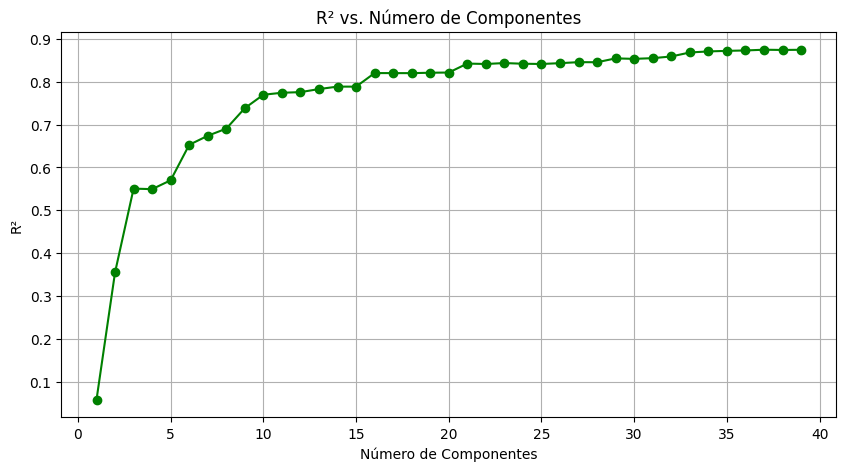

Número ideal de componentes: 37
RMSE no conjunto de teste: 0.8020
R² no conjunto de teste: 0.8506


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainXtrans.txt", sep='\t')
X_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainXtrans.csv', index = None)

y_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.txt", sep='\t')
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv', index = None)

X_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestXtrans.txt", sep='\t')
X_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestXtrans.csv', index = None)

y_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.txt", sep='\t')
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv', index = None)

## Número de componentes para testar
n_components = range(1, 40)

rmse_scores = []
r2_scores = []

lr = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for n in n_components:

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)

    ## Validação cruzada no conjunto de treinamento
    y_pred = cross_val_predict(lr, X_train_pca, y_train, cv=kf)

    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)


best_n = np.argmin(rmse_scores) + 1

pca = PCA(n_components=best_n)
X_train_pca = pca.fit_transform(X_train)

lr.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

y_test_pred = lr.predict(X_test_pca)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

import matplotlib.pyplot as plt

## Gráficos
plt.figure(figsize=(10, 5))
plt.plot(n_components, rmse_scores, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('RMSE')
plt.title('RMSE vs. Número de Componentes')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(n_components, r2_scores, marker='o', color='green')
plt.xlabel('Número de Componentes')
plt.ylabel('R²')
plt.title('R² vs. Número de Componentes')
plt.grid()
plt.show()

print(f"Número ideal de componentes: {best_n}")
print(f"RMSE no conjunto de teste: {rmse_test:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")



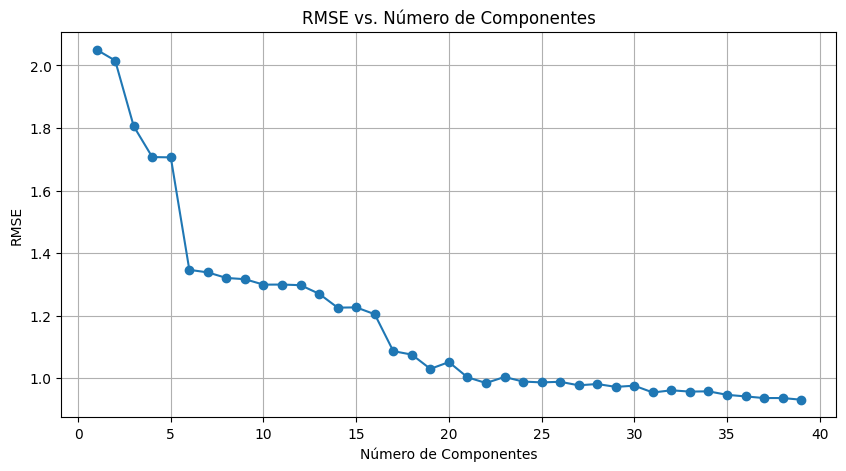

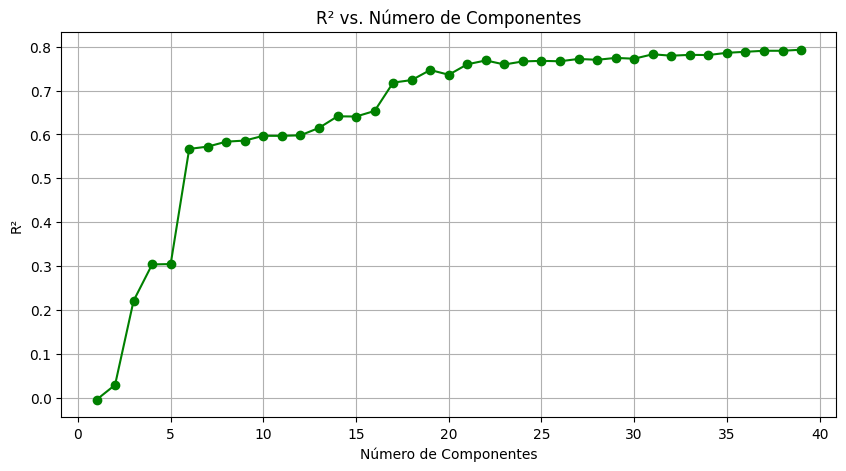

Número ideal de componentes: 39
RMSE no conjunto de teste: 0.9714
R² no conjunto de teste: 0.7809


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainX_normalized_filtered.csv")

y_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.txt", sep='\t')
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv', index = None)

X_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestX_normalized_filtered.csv")

y_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.txt", sep='\t')
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv', index = None)

## Número de componentes para testar
n_components = range(1, 40)

rmse_scores = []
r2_scores = []

lr = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in n_components:

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)

    ## Validação cruzada no conjunto de treinamento
    y_pred = cross_val_predict(lr, X_train_pca, y_train, cv=kf)

    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)


best_n = np.argmin(rmse_scores) + 1

pca = PCA(n_components=best_n)
X_train_pca = pca.fit_transform(X_train)

lr.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

y_test_pred = lr.predict(X_test_pca)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

import matplotlib.pyplot as plt

## Gráficos
plt.figure(figsize=(10, 5))
plt.plot(n_components, rmse_scores, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('RMSE')
plt.title('RMSE vs. Número de Componentes')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(n_components, r2_scores, marker='o', color='green')
plt.xlabel('Número de Componentes')
plt.ylabel('R²')
plt.title('R² vs. Número de Componentes')
plt.grid()
plt.show()

print(f"Número ideal de componentes: {best_n}")
print(f"RMSE no conjunto de teste: {rmse_test:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")


## **PLS com o nosso pré processamento**

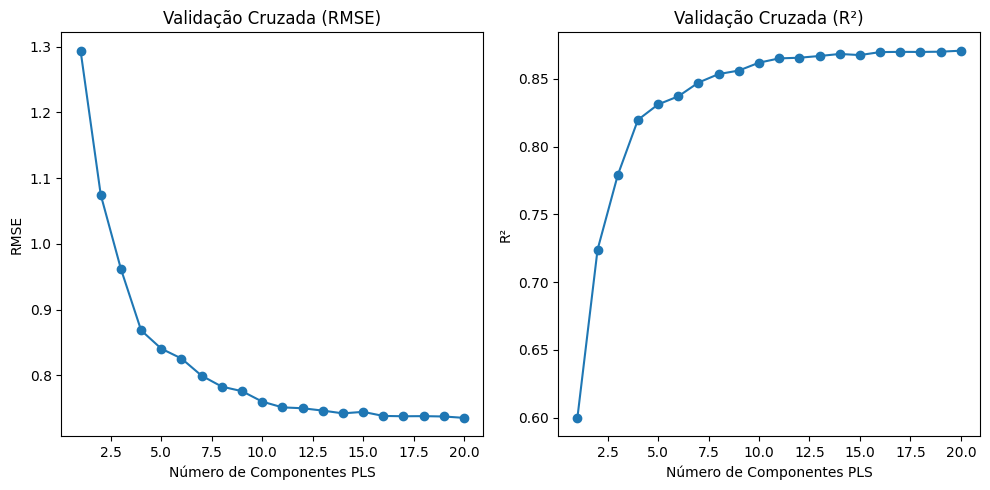

Número ideal de componentes: 20
RMSE no conjunto de teste: 0.7422
R² no conjunto de teste: 0.8721


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/soltrainX_YJ_Filtered.csv")

y_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.txt", sep='\t')
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv', index = None)

X_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/soltestX_YJ_Filtered.csv")

y_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.txt", sep='\t')
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv', index = None)

## Testando os componentes
n_components = list(range(1, 21))

rmse_scores = []
r2_scores = []

## Escolhemos a validação cruzada de 5 dobras
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for n in n_components:
    pls = PLSRegression(n_components=n)
    y_pred = cross_val_predict(pls, X_train, y_train, cv=kf)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components, rmse_scores, marker='o')
plt.xlabel('Número de Componentes PLS')
plt.ylabel('RMSE')
plt.title('Validação Cruzada (RMSE)')

plt.subplot(1, 2, 2)
plt.plot(n_components, r2_scores, marker='o')
plt.xlabel('Número de Componentes PLS')
plt.ylabel('R²')
plt.title('Validação Cruzada (R²)')

plt.tight_layout()
plt.show()

## Ver qual o melhor número de componentes com base no menor RMSE
optimal_n_components = n_components[np.argmin(rmse_scores)]
print(f"Número ideal de componentes: {optimal_n_components}")


pls = PLSRegression(n_components=optimal_n_components)
pls.fit(X_train, y_train)

## Teste
y_pred_test = pls.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"RMSE no conjunto de teste: {rmse_test:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")


## **PCR com o nosso pré processamento**

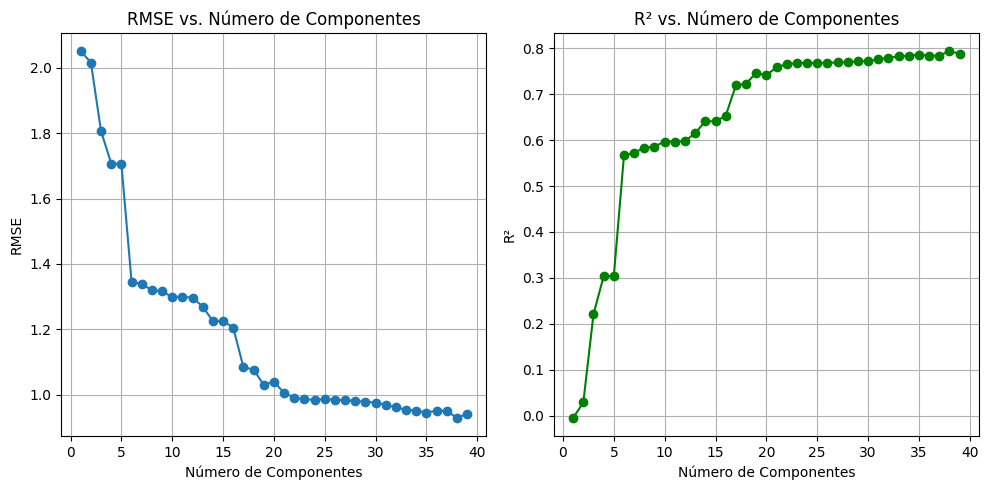

Número ideal de componentes: 38
RMSE no conjunto de teste: 0.9845
R² no conjunto de teste: 0.7749


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/soltrainX_YJ_Filtered.csv")

y_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.txt", sep='\t')
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv', index = None)

X_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/soltestX_YJ_Filtered.csv")

y_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.txt", sep='\t')
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv', index = None)


## Número de componentes para testar
n_components = range(1, 40)

rmse_scores = []
r2_scores = []

lr = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in n_components:

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)

    ## Validação cruzada no conjunto de treinamento
    y_pred = cross_val_predict(lr, X_train_pca, y_train, cv=kf)

    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)


best_n = np.argmin(rmse_scores) + 1

pca = PCA(n_components=best_n)
X_train_pca = pca.fit_transform(X_train)

lr.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

y_test_pred = lr.predict(X_test_pca)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

import matplotlib.pyplot as plt

## Gráficos
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components, rmse_scores, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('RMSE')
plt.title('RMSE vs. Número de Componentes')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(n_components, r2_scores, marker='o', color='green')
plt.xlabel('Número de Componentes')
plt.ylabel('R²')
plt.title('R² vs. Número de Componentes')
plt.grid()

plt.tight_layout()
plt.show()


print(f"Número ideal de componentes: {best_n}")
print(f"RMSE no conjunto de teste: {rmse_test:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")


# **Questão 4**

10/10 [==============================] - 0s 2ms/step
Epoch 1 - RMSE: 1.1701719915587363, R²: 0.6820289952956607
10/10 [==============================] - 0s 2ms/step
Epoch 2 - RMSE: 0.9711699983489293, R²: 0.7809825912161033
10/10 [==============================] - 0s 2ms/step
Epoch 3 - RMSE: 0.9210948630933452, R²: 0.8029861119611725
10/10 [==============================] - 0s 2ms/step
Epoch 4 - RMSE: 0.8561399784849184, R²: 0.8297928984698919
10/10 [==============================] - 0s 2ms/step
Epoch 5 - RMSE: 0.8350217709631148, R²: 0.8380862547274488
10/10 [==============================] - 0s 2ms/step
Epoch 6 - RMSE: 0.808092666815786, R²: 0.8483611602909212
10/10 [==============================] - 0s 2ms/step
Epoch 7 - RMSE: 0.7905714729926056, R²: 0.8548655873589824
10/10 [==============================] - 0s 2ms/step
Epoch 8 - RMSE: 0.7707982860429873, R²: 0.8620347850688901
10/10 [==============================] - 0s 2ms/step
Epoch 9 - RMSE: 0.7638642043253172, R²: 0.8645058829

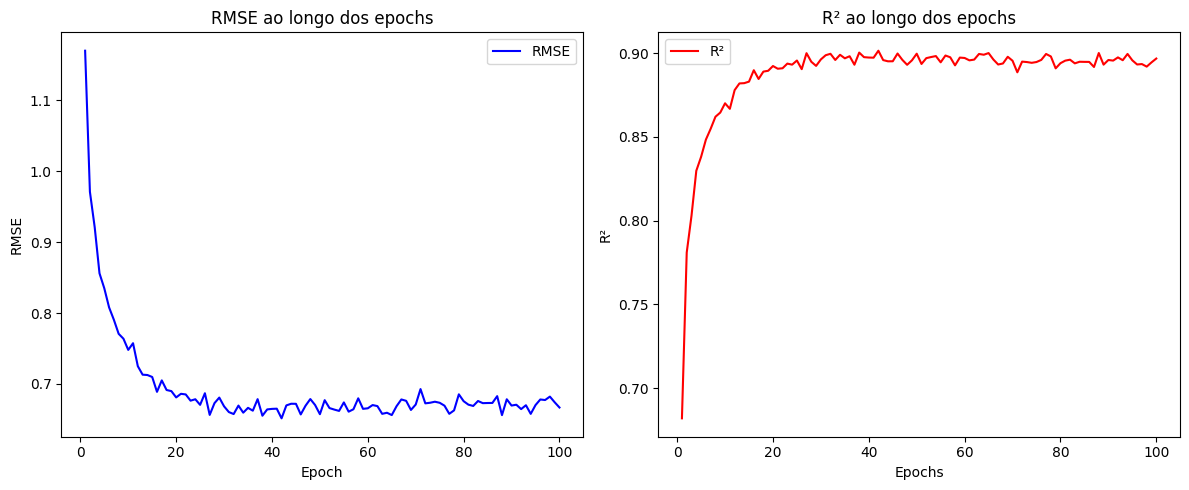

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/soltrainX_YJ_Filtered.csv")

y_train = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTrainY.txt", sep='\t')
y_train.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTrainY.csv', index = None)

X_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/soltestX_YJ_Filtered.csv")

y_test = pd.read_csv("/content/drive/MyDrive/6 Semestre/HW2/solTestY.txt", sep='\t')
y_test.to_csv('/content/drive/MyDrive/6 Semestre/HW2/solTestY.csv', index = None)

model = keras.Sequential([
    keras.layers.Input(shape=(192,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

rmse_values = []
r2_values = []

for epoch in range(1, 101):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    rmse_values.append(rmse)
    r2_values.append(r2)
    print(f"Epoch {epoch} - RMSE: {rmse}, R²: {r2}")


epochs = range(1, 101)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, rmse_values, 'b', label='RMSE')
plt.title('RMSE ao longo dos epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, 'r', label='R²')
plt.title('R² ao longo dos epochs')
plt.xlabel('Epochs')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()